# 1. Data cleaning including missing values, outliers and multi-collinearity.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
import sklearn
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='isFraud'>

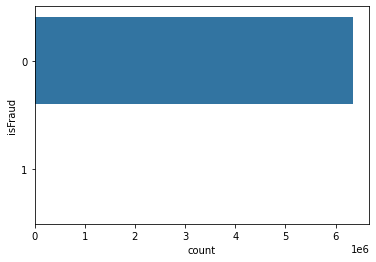

In [13]:
sns.countplot(y=df['isFraud'])

<AxesSubplot:xlabel='count', ylabel='isFlaggedFraud'>

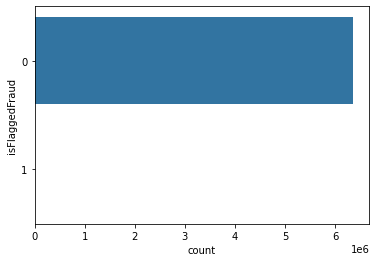

In [14]:
sns.countplot(y=df['isFlaggedFraud'])

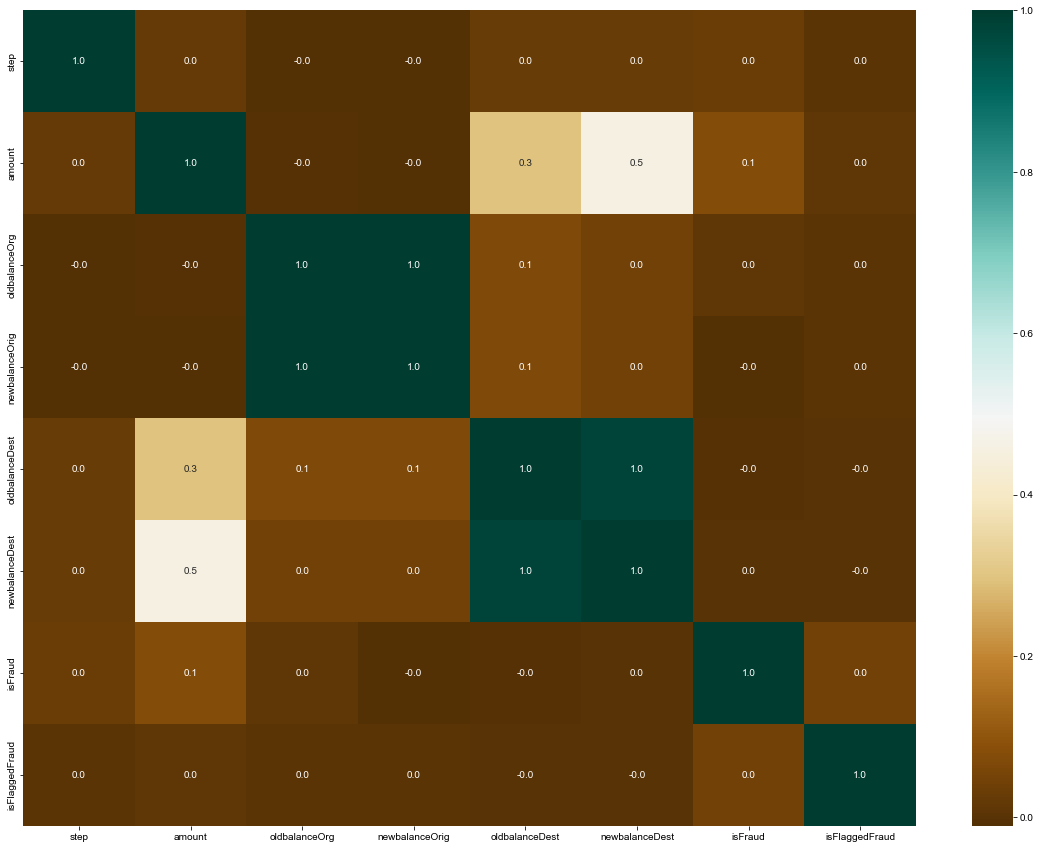

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=2.25)
plt.show()

In [16]:
corr=df.corr()

In [17]:
corr.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [18]:
corr_matrix = df.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
Name: isFlaggedFraud, dtype: float64

In [19]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [20]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

C:\Users\palla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

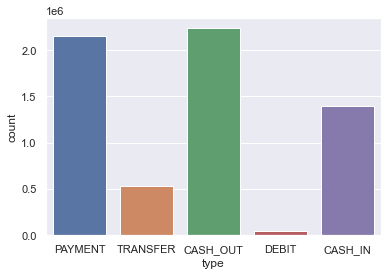

In [21]:
sns.set(font_scale = 1)
sns.countplot(df['type'])

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

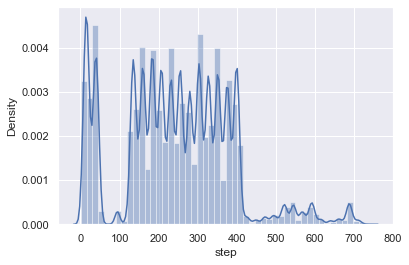

In [22]:
sns.distplot(df['step'])

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

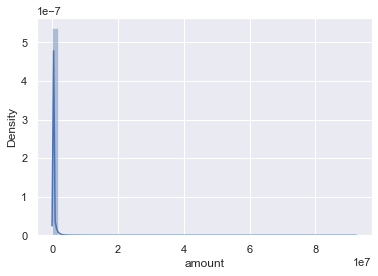

In [23]:
sns.distplot(df['amount'])

In [24]:
fraud = df[df['isFraud'] == 1]

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

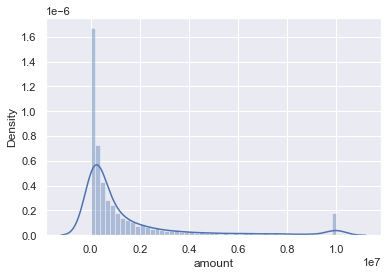

In [25]:
sns.distplot(fraud['amount'])

In [26]:
df['nameOrig'].nunique(), df['nameDest'].nunique()

(6353307, 2722362)

In [27]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# 2. Fraud detection model. & 4.Demonstrate the performance of the model by using best set of tools.

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [41]:
df.nameOrig = label.fit_transform(df.nameOrig)
df.nameDest = label.fit_transform(df.nameDest)
df.type = label.fit_transform(df.type)

In [43]:
df[['nameOrig', 'nameDest','type']]

,nameOrig,nameDest,type
0,757869,1662094,0
1,2188998,1733924,0
2,1002156,439685,3
3,5828262,391696,1
4,3445981,828919,0
...,...,...,...
6362615,5651847,505863,1
6362616,1737278,260949,3
6362617,533958,108224,1
6362618,2252932,319713,3


In [44]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,0,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,3,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,0,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [45]:
X = df.drop('isFlaggedFraud', axis=1)
Y = df['isFlaggedFraud']

In [46]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0
1,1,0,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0
2,1,3,181.00,1002156,181.00,0.00,439685,0.00,0.00,1
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1
4,1,0,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1
6362616,743,3,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1
6362618,743,3,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1


In [47]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [100]:
Y_train

2408104    0
662430     0
496595     0
5053741    0
755621     0
          ..
1570006    0
2234489    0
4926484    0
4304572    0
1692743    0
Name: isFlaggedFraud, Length: 4453834, dtype: int64

In [101]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2408104,202,4,26771.98,2487575,27521.00,54292.98,18776,7175503.03,7148731.05,0
662430,36,1,344879.65,1909142,0.00,0.00,125492,3731846.57,4076726.22,0
496595,20,3,1862607.84,4401349,0.00,0.00,317835,3329828.01,4913631.27,0
5053741,354,0,37739.35,5203756,66684.93,28945.58,604220,0.00,0.00,0
755621,38,1,376055.13,2337985,22501.00,0.00,26843,182350.43,558405.55,0
...,...,...,...,...,...,...,...,...,...,...
1570006,155,4,129715.85,2323574,5054252.83,5183968.68,239829,246692.94,116977.09,0
2234489,186,0,2459.70,2773170,0.00,0.00,1527061,0.00,0.00,0
4926484,350,1,10579.16,1903639,59279.00,48699.84,35205,322754.16,333333.32,0
4304572,307,1,73020.76,4311664,20289.00,0.00,284813,256102.84,329123.61,0


In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dtree=DecisionTreeRegressor(max_depth=75)
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=75,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [104]:
dtree.score(X_train, Y_train)

1.0

In [105]:
dtree.score(X_test, Y_test)

0.7142846664954787

In [107]:
p_test = dtree.predict(X_test)

In [108]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [110]:
mae(p_test, Y_test)

1.0477863940745583e-06

In [120]:
def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, Y_train)))
    print("validation r^2 " + str(mm.score(X_test, Y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, Y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, Y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 0.7142846664954787
mean absolute error(Train): 0.0
mean absolute error(Validation): 1.0477863940745583e-06


In [121]:
p_test = dtree.predict(X_test)

In [122]:
p_test

array([0., 0., 0., ..., 0., 0., 0.])

# 3. How did you select variables to be included in the model?

By checking the highest Correlation between the Target Variable and other Variables

# 5. What are the key factors that predict fraudulent customer?

We can see that fraud is only when amount is low so the key factors will amount and isFraud

# 6.Do these factors make sense? If yes, How? If not, How not?

Yes it make sense as it shown in the graph when the amount is low then the density of fraud is more 

# 7. What kind of prevention should be adopted while company update its infrastructure?

The company can introduce OTP system or every transaction so the fraudulent agents inside the simulation can't transfer the funds to other accounts from other customer's accounts

# 8. Assuming these actions have been implemented, how would you determine if they work?

If these actions are implemented, then feel it will work better than current situation which will help to reduce frauds